In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/kaggle/input/shai-music-genre-classification-2/train (1).csv')
df.head()

## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

In [5]:
df.isna().sum()

Id                       0
Artist Name              0
Track Name               0
Popularity             333
danceability             0
energy                   0
key                   1609
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3541
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [6]:
df.dropna(inplace = True)
df = df.drop(['Id', 'Artist Name', 'Track Name'], axis=1)

In [7]:
df.isna().sum()

Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9412 entries, 1 to 14395
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Popularity          9412 non-null   float64
 1   danceability        9412 non-null   float64
 2   energy              9412 non-null   float64
 3   key                 9412 non-null   float64
 4   loudness            9412 non-null   float64
 5   mode                9412 non-null   int64  
 6   speechiness         9412 non-null   float64
 7   acousticness        9412 non-null   float64
 8   instrumentalness    9412 non-null   float64
 9   liveness            9412 non-null   float64
 10  valence             9412 non-null   float64
 11  tempo               9412 non-null   float64
 12  duration_in min/ms  9412 non-null   float64
 13  time_signature      9412 non-null   int64  
 14  Class               9412 non-null   int64  
dtypes: float64(12), int64(3)
memory usage: 1.1 MB


In [20]:
df.describe()

Popularity  danceability       energy          key     loudness  \
count  9412.000000   9412.000000  9412.000000  9412.000000  9412.000000   
mean     43.168721      0.524349     0.669794     5.972907    -8.211778   
std      16.566433      0.165417     0.243421     3.167315     4.267179   
min       1.000000      0.064400     0.001240     1.000000   -36.214000   
25%      32.000000      0.413000     0.510750     3.000000   -10.005500   
50%      43.000000      0.526000     0.716000     6.000000    -7.309000   
75%      54.000000      0.636000     0.876250     9.000000    -5.311000   
max      98.000000      0.989000     1.000000    11.000000     1.342000   

              mode  speechiness  acousticness  instrumentalness     liveness  \
count  9412.000000  9412.000000   9412.000000       9412.000000  9412.000000   
mean      0.625797     0.071122      0.239737          0.179897     0.194727   
std       0.483942     0.068123      0.319015          0.304346     0.159714   
min       0.000000     0.022500      0.000000          0.000001     0.011900   
25%       0.000000     0.034600      0.001820          0.000093     0.096700   
50%       1.000000     0.046100      0.056850          0.004310     0.127000   
75%       1.000000     0.076500      0.419000          0.211000     0.253250   
max       1.000000     0.935000      0.996000          0.996000     0.992000   

           valence        tempo  duration_in min/ms  time_signature  \
count  9412.000000  9412.000000        9.412000e+03     9412.000000   
mean      0.468743   123.063930        2.124931e+05        3.915002   
std       0.244040    29.449393        1.153708e+05        0.377904   
min       0.021500    30.557000        5.016500e-01        1.000000   
25%       0.270000   100.012750        1.752262e+05        4.000000   
50%       0.458000   120.061500        2.174910e+05        4.000000   
75%       0.658000   141.907000        2.633570e+05        4.000000   
max       0.980000   217.416000        1.477187e+06        5.000000   

             Class  
count  9412.000000  
mean      6.629941  
std       3.246277  
min       0.000000  
25%       5.000000  
50%       8.000000  
75%      10.000000  
max      10.000000

In [52]:
df.corr()["Class"].sort_values(ascending=False)

Class                 1.000000
energy                0.217663
duration_in min/ms    0.202740
Popularity            0.167202
loudness              0.160725
time_signature        0.040272
liveness              0.039757
tempo                 0.033284
key                   0.007158
speechiness          -0.018164
mode                 -0.029513
instrumentalness     -0.035133
valence              -0.095338
danceability         -0.115610
acousticness         -0.252490
Name: Class, dtype: float64

<Axes: >

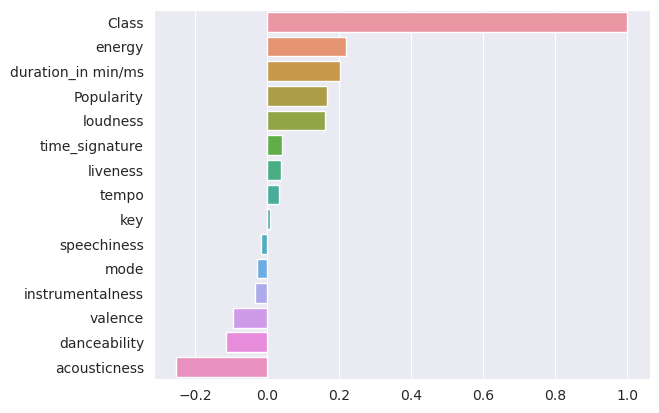

In [51]:
sns.barplot(x=df.corr()["Class"].sort_values(ascending=False).values, y=df.corr()["Class"].sort_values(ascending=False).index, orient='h')

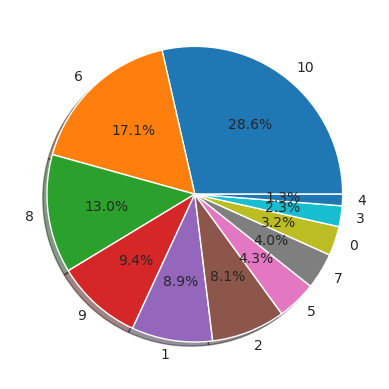

In [11]:
plt.pie(df['Class'].value_counts().values, labels=df['Class'].value_counts().index, autopct='%1.1f%%', labeldistance=1.1, shadow=True);

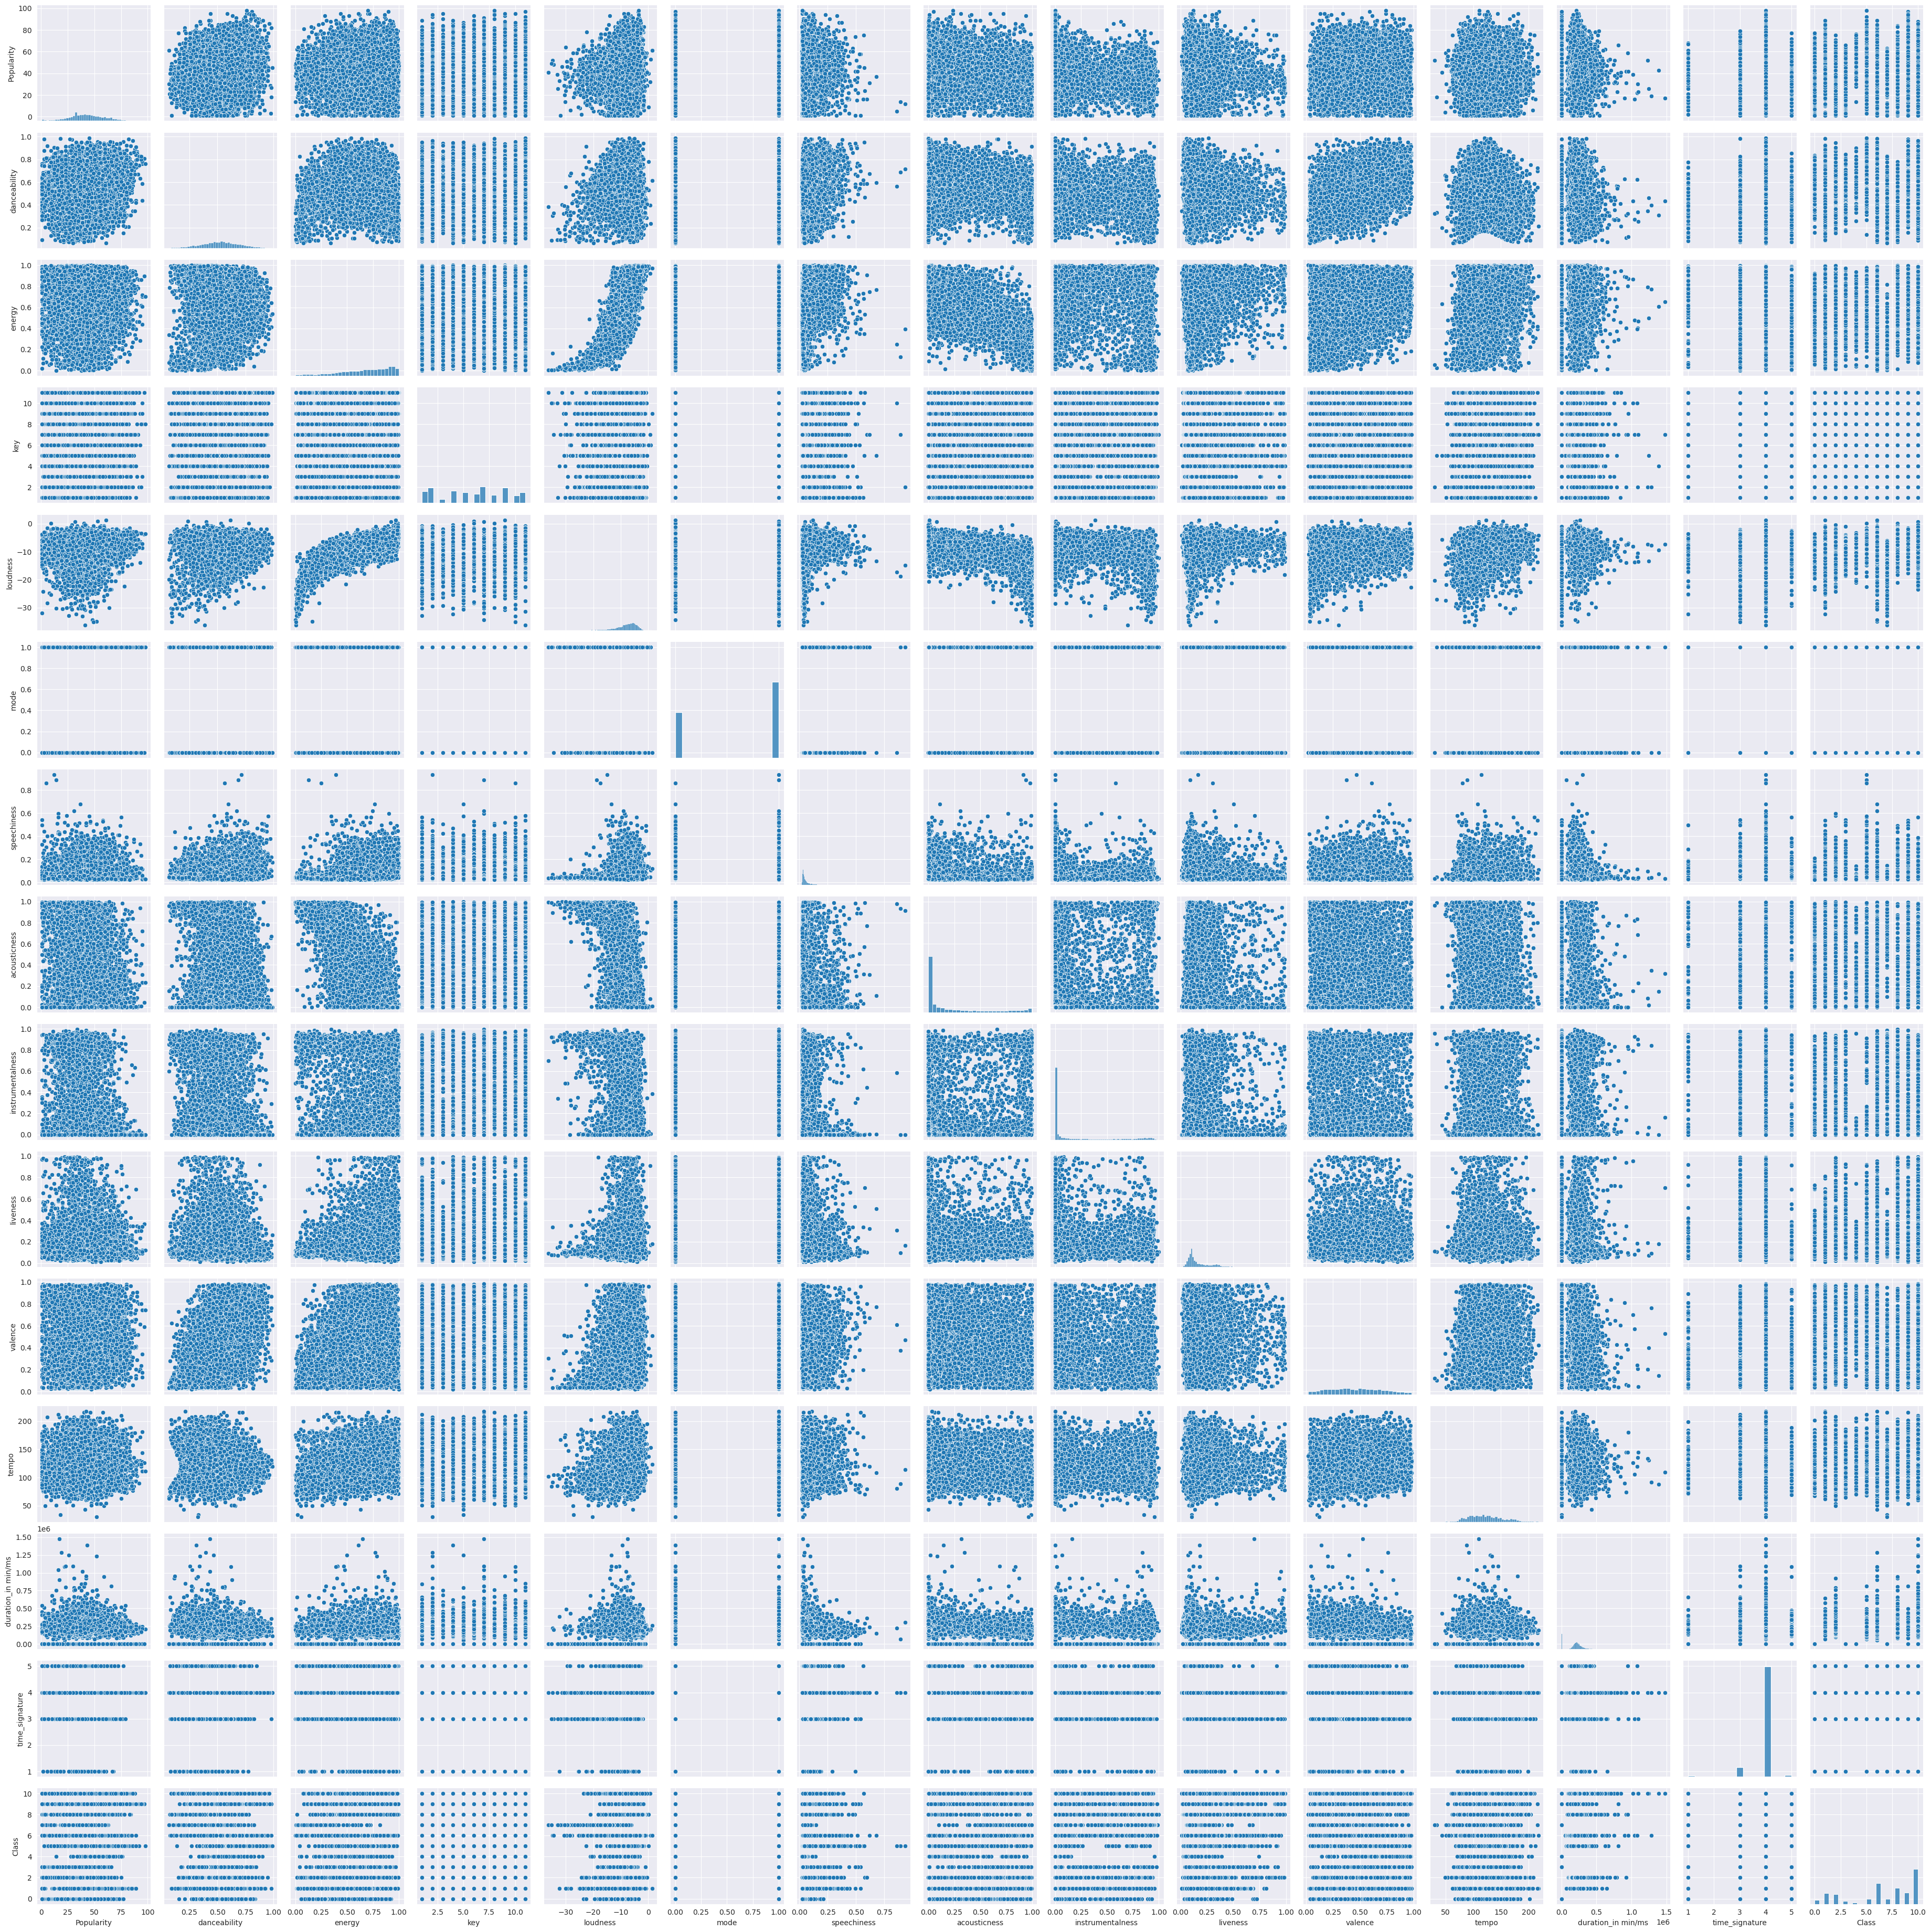

In [12]:
sns.pairplot(df);

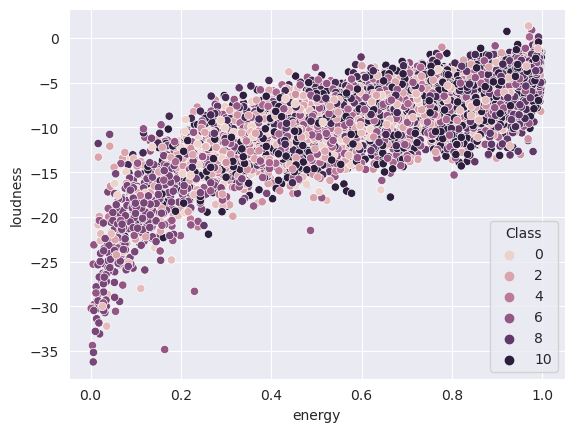

In [15]:
sns.scatterplot(data=df, x='energy', y='loudness', hue='Class');

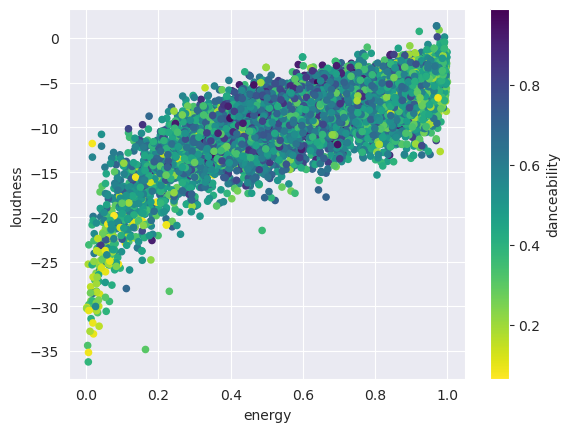

In [19]:
df.plot(kind='scatter',x='energy', y='loudness', cmap='viridis_r', c='danceability', colorbar=True);

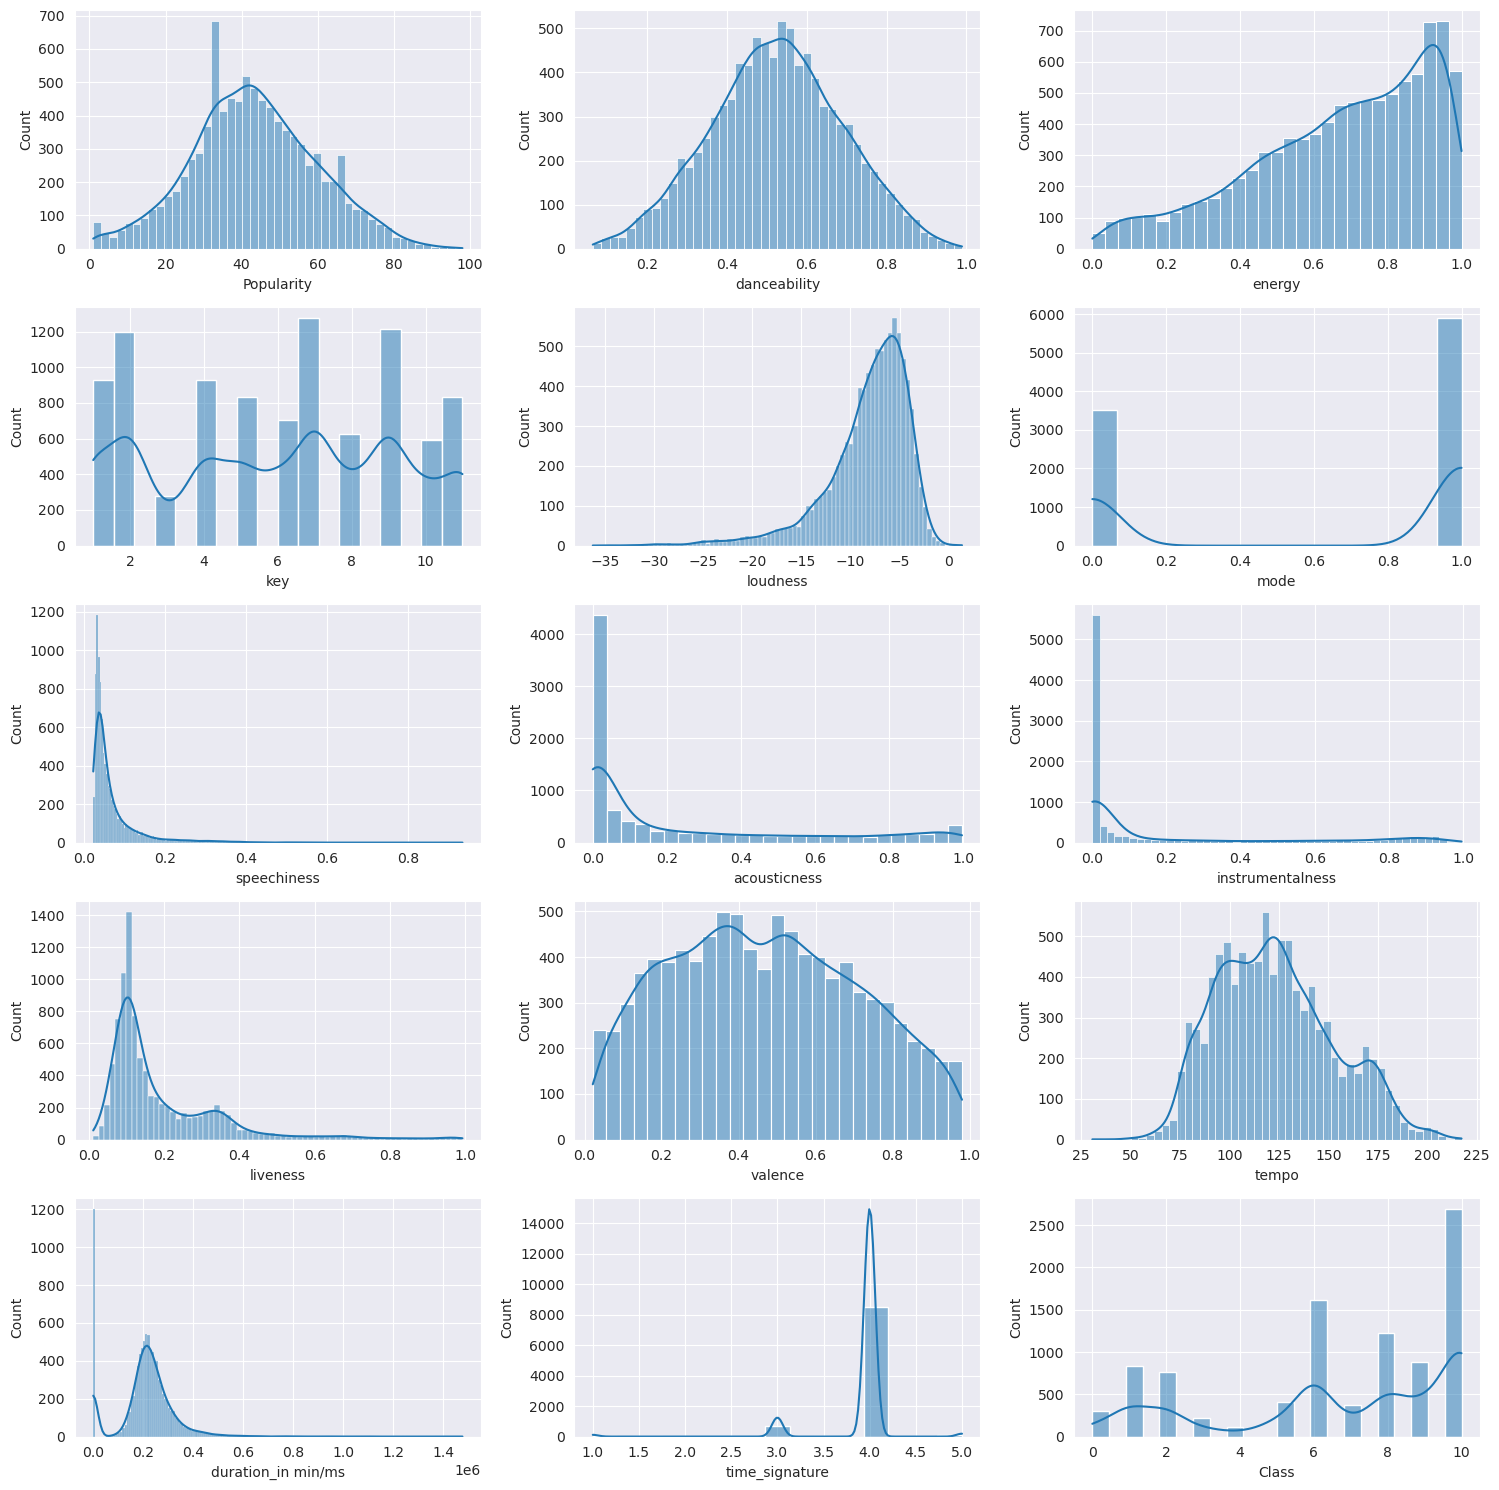

In [30]:
plt.figure(figsize=(15, 15))

for i in range(df.shape[1]):
    plt.subplot(5,3,i+1)
    sns.histplot(data=df, x=df.columns[i], kde=True)

plt.tight_layout()

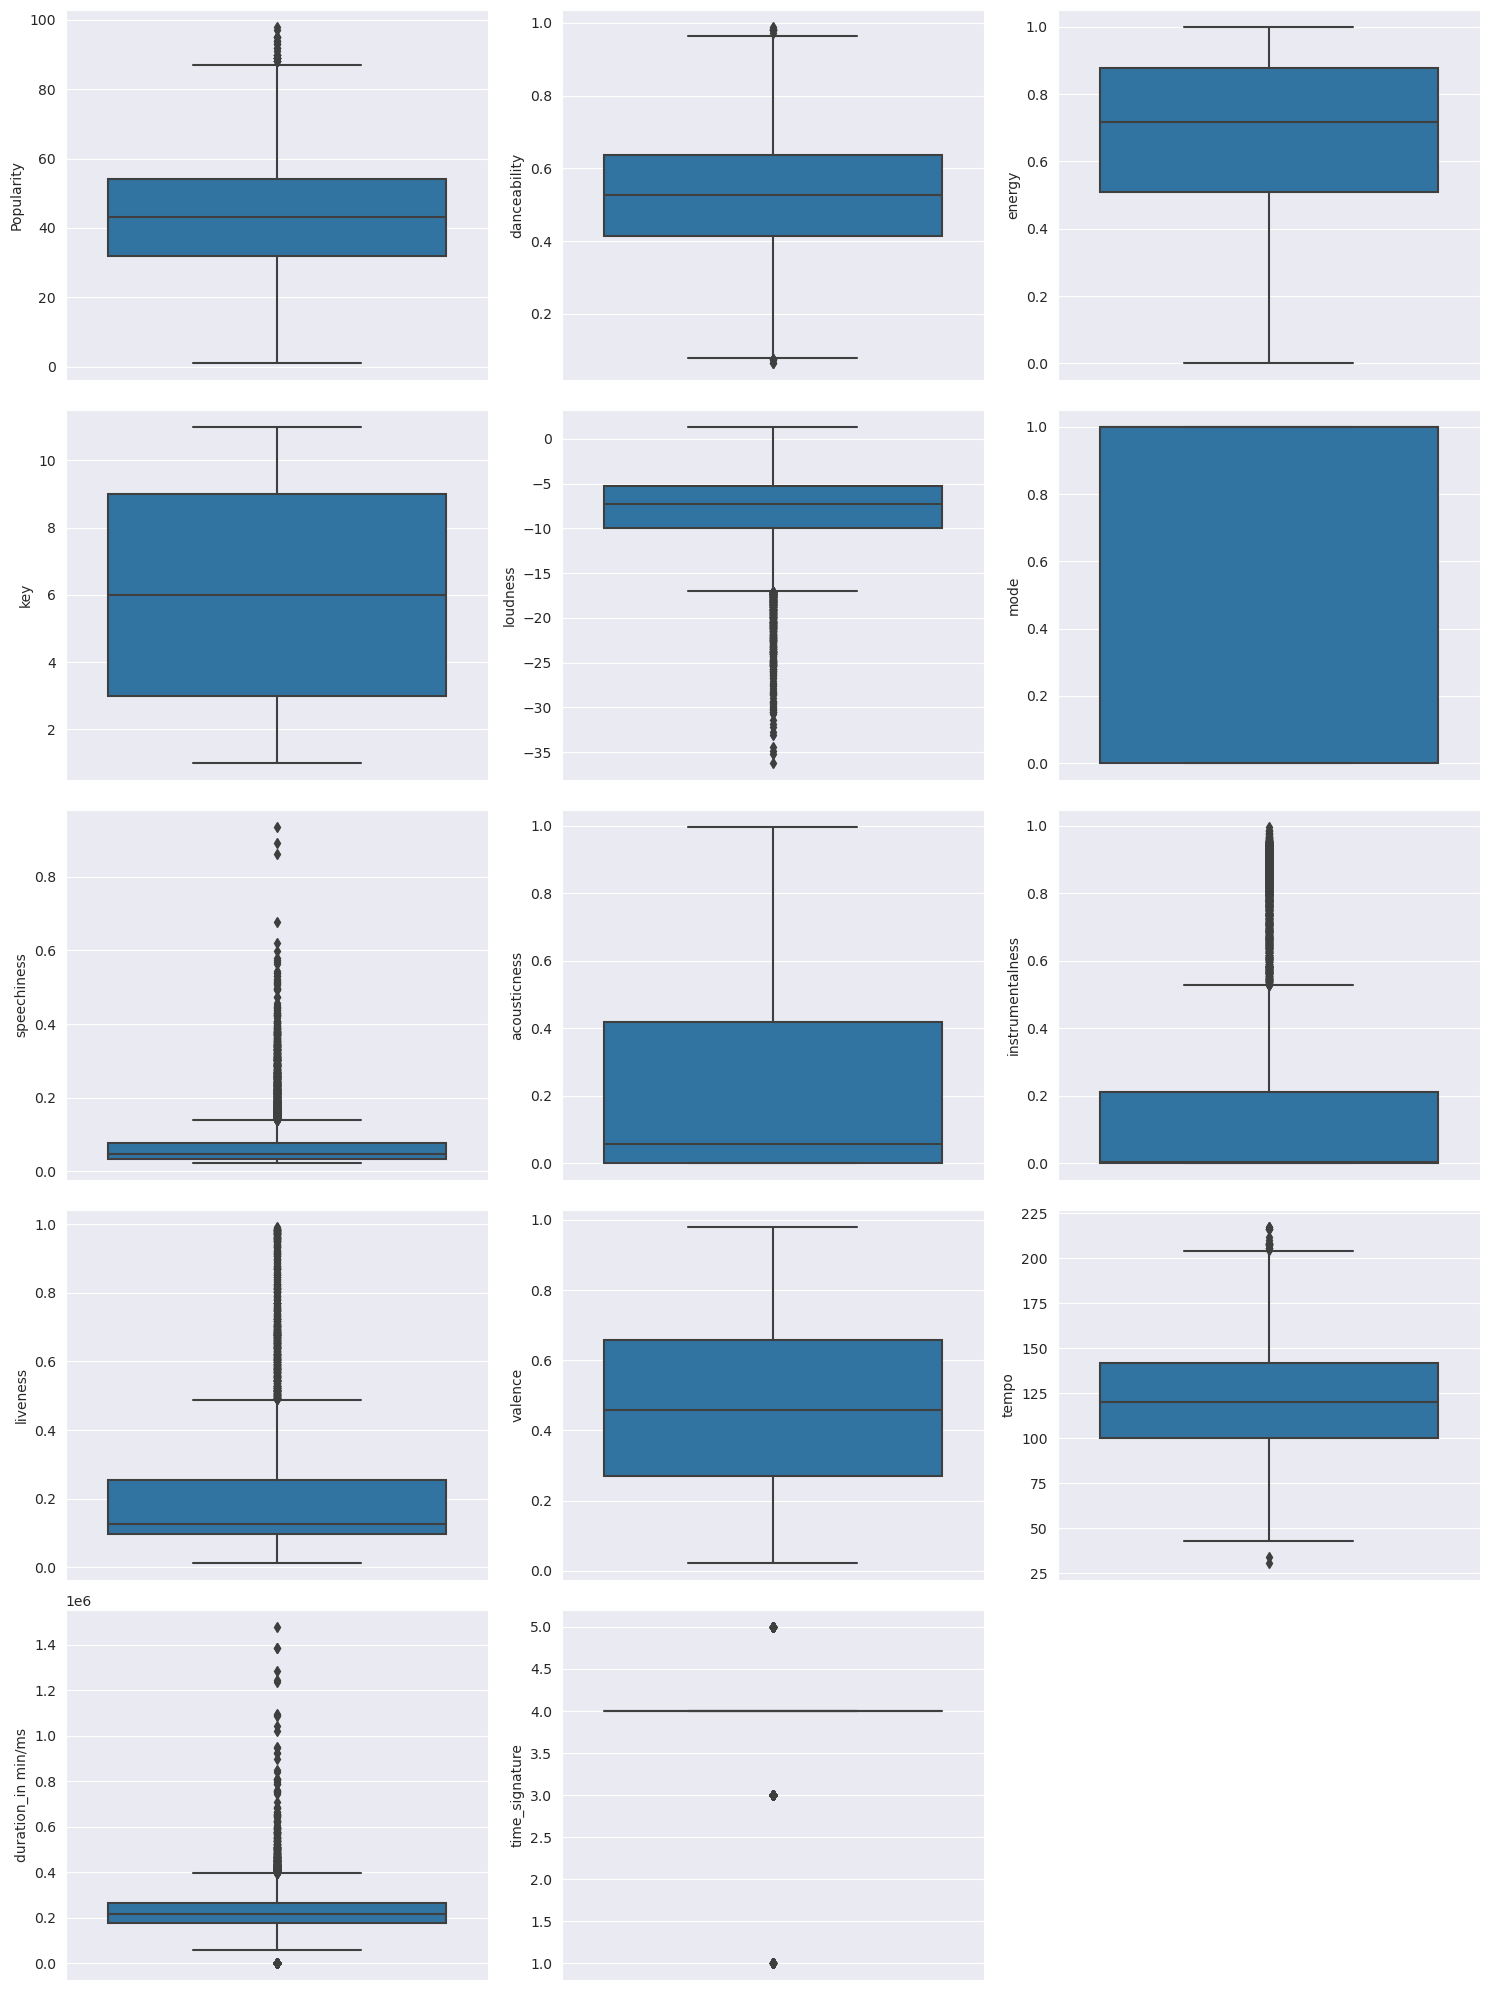

In [36]:
plt.figure(figsize=(15, 20))
size = df.shape[1] - 1

for i in range(size):
    plt.subplot(5,3,i+1)
    sns.boxplot(data = df, y = df.columns[i], orient='v')

plt.tight_layout()

## Preprocessing

In [9]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y ,shuffle=True)

print(X_train.shape)
print(X_test.shape)

(7529, 14)
(1883, 14)


In [35]:
scaler = StandardScaler()
scaled_train = scaler.fit_transform(X_train)
scaled_test = scaler.transform(X_test)

In [36]:
smote_samples = {6:2000, 1:2000, 2:2000, 5:2000, 7:2000, 0:2000, 3:2000, 8:2000, 4:2000, 9:2000}
oversampler = SMOTE(sampling_strategy=smote_samples, random_state=0)

X_train_res, y_train_res = oversampler.fit_resample(scaled_train, y_train)
X_train_res.shape

(22150, 14)

In [37]:
y_train_res.value_counts()

10    2150
9     2000
7     2000
8     2000
6     2000
1     2000
2     2000
5     2000
0     2000
3     2000
4     2000
Name: Class, dtype: int64

In [54]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(RandomForestClassifier(n_estimators = 100))
selector.fit(X_train_res, y_train_res)

SelectFromModel(estimator=RandomForestClassifier())

In [63]:
selected_features = X_train.columns[(selector.get_support())]
print('no. of original features : ', X_train.shape[1])
print('no. of features after feature selection : ', len(selected_features))
print("============================================")
print(selected_features)

no. of original features :  14
no. of features after feature selection :  8
Index(['Popularity', 'danceability', 'energy', 'speechiness', 'acousticness',
       'instrumentalness', 'valence', 'duration_in min/ms'],
      dtype='object')


In [66]:
reduced_train = selector.transform(X_train_res)

reduced_test = selector.transform(scaled_test)

(1883, 8)

## Trying Different Models

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

In [67]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(reduced_train, y_train_res)

ypred1 = knn_clf.predict(reduced_test)
r1 = classification_report(y_test, ypred1)
print(r1)

              precision    recall  f1-score   support

           0       0.61      0.70      0.65        60
           1       0.12      0.23      0.16       167
           2       0.35      0.51      0.42       152
           3       0.75      0.77      0.76        43
           4       0.41      0.62      0.49        24
           5       0.35      0.62      0.44        81
           6       0.30      0.25      0.27       322
           7       0.91      0.93      0.92        74
           8       0.50      0.66      0.57       245
           9       0.28      0.31      0.30       177
          10       0.43      0.14      0.21       538

    accuracy                           0.37      1883
   macro avg       0.46      0.52      0.47      1883
weighted avg       0.40      0.37      0.36      1883



In [68]:
nb_clf = GaussianNB()
nb_clf.fit(reduced_train, y_train_res)
ypred2 = nb_clf.predict(reduced_test)

r2 = classification_report(y_test, ypred2)
print(r2)

              precision    recall  f1-score   support

           0       0.61      0.62      0.61        60
           1       0.17      0.11      0.14       167
           2       0.33      0.56      0.42       152
           3       0.57      0.56      0.56        43
           4       0.35      0.88      0.50        24
           5       0.35      0.69      0.46        81
           6       0.50      0.18      0.27       322
           7       0.93      0.92      0.93        74
           8       0.40      0.81      0.54       245
           9       0.24      0.35      0.28       177
          10       0.56      0.26      0.35       538

    accuracy                           0.41      1883
   macro avg       0.46      0.54      0.46      1883
weighted avg       0.45      0.41      0.38      1883



In [69]:
svc_clf = SVC(random_state=0)
svc_clf.fit(reduced_train, y_train_res)
ypred3 = svc_clf.predict(reduced_test)

r3 = classification_report(y_test, ypred3)
print(r3)

              precision    recall  f1-score   support

           0       0.68      0.65      0.67        60
           1       0.16      0.17      0.16       167
           2       0.36      0.60      0.45       152
           3       0.71      0.86      0.78        43
           4       0.37      0.62      0.46        24
           5       0.40      0.68      0.50        81
           6       0.47      0.27      0.35       322
           7       0.93      0.95      0.94        74
           8       0.51      0.71      0.60       245
           9       0.33      0.42      0.37       177
          10       0.55      0.34      0.42       538

    accuracy                           0.46      1883
   macro avg       0.50      0.57      0.52      1883
weighted avg       0.48      0.46      0.45      1883



In [71]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train_res, y_train_res)
ypred4 = rf_clf.predict(scaled_test)

r4 = classification_report(y_test, ypred4)
print(r4)

              precision    recall  f1-score   support

           0       0.71      0.78      0.75        60
           1       0.08      0.07      0.07       167
           2       0.44      0.59      0.50       152
           3       0.72      0.91      0.80        43
           4       0.60      0.62      0.61        24
           5       0.47      0.65      0.55        81
           6       0.35      0.31      0.33       322
           7       0.95      0.95      0.95        74
           8       0.56      0.64      0.60       245
           9       0.36      0.37      0.36       177
          10       0.47      0.39      0.43       538

    accuracy                           0.46      1883
   macro avg       0.52      0.57      0.54      1883
weighted avg       0.45      0.46      0.45      1883



## parameters tuning

In [ ]:
rf_parameters = {}
rf_tuned = 